1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.

[Hint: Extract values of a specific column using their labels and use hismethod of pyplot]

In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [93]:
ce=pd.read_csv('cereal.csv')
ce.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


In [94]:
ce.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

Text(0.5, 1.0, 'Vitamin vs cereals')

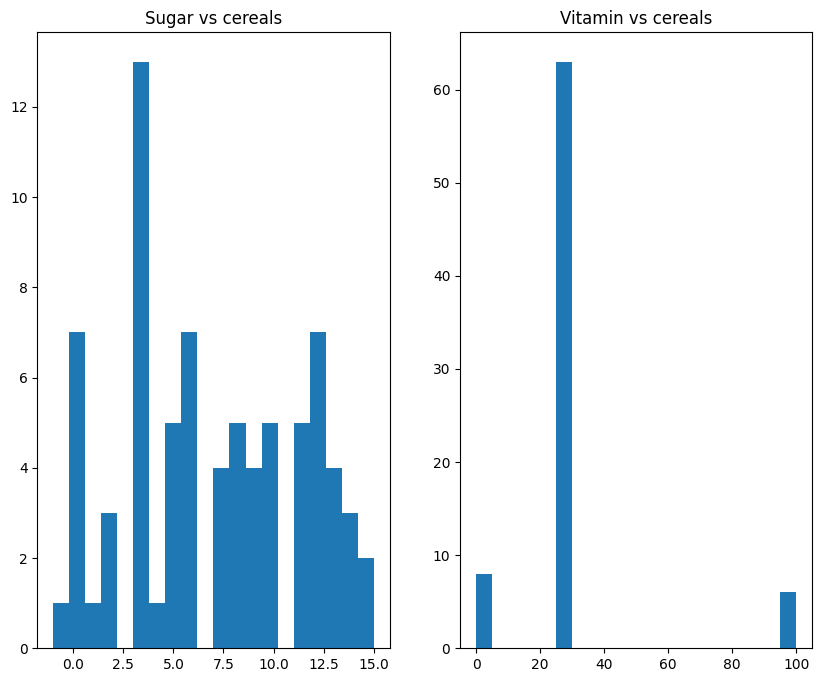

In [95]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.hist(ce['sugars'],bins=20)
plt.title('Sugar vs cereals')

plt.subplot(1,2,2)
plt.hist(ce['vitamins'],bins=20)
plt.title('Vitamin vs cereals')

2.The names of the manufacturers

are coded using alphabets, create a new column with their full name using the below mapping.

'N': 'Nabisco','Q': 'Quaker Oats','K': 'Kelloggs','R': 'Raslston Purina','G': 'General Mills','P' :'Post' ,'A':'American Home Foods Products


In [96]:
ce['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [97]:
mfr_list={'N': 'Nabisco','Q': 'Quaker Oats','K': 'Kelloggs','R': 'Raslston Purina','G': 'General Mills','P' :'Post' ,'A':'American Home Foods Products'}

ce['Manufracture']=ce['mfr'].map(mfr_list)

In [98]:
ce.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufracture
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


Create a bar plot where each manufacturer is on the y axis and the height of the bars depictsthe number of cereals 

manufactured by them.[Hint: Try using count plotthis time or bar method of pyplot]

In [99]:
order=ce['Manufracture'].value_counts()
order

Manufracture
Kelloggs                        23
General Mills                   22
Post                             9
Quaker Oats                      8
Raslston Purina                  8
Nabisco                          6
American Home Foods Products     1
Name: count, dtype: int64

In [100]:
import seaborn as sns

Text(0.5, 1.0, 'Number of Cereals Manufactured by Each Manufacturer')

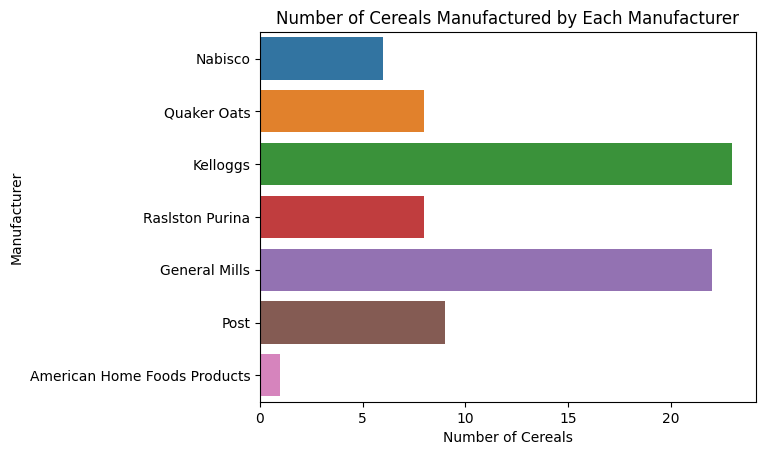

In [101]:
sns.countplot(y=ce['Manufracture'], data=ce)
plt.xlabel("Number of Cereals")
plt.ylabel("Manufacturer")
plt.title("Number of Cereals Manufactured by Each Manufacturer")

Text(0.5, 1.0, 'Number of Cereals Manufactured by Each Manufacturer')

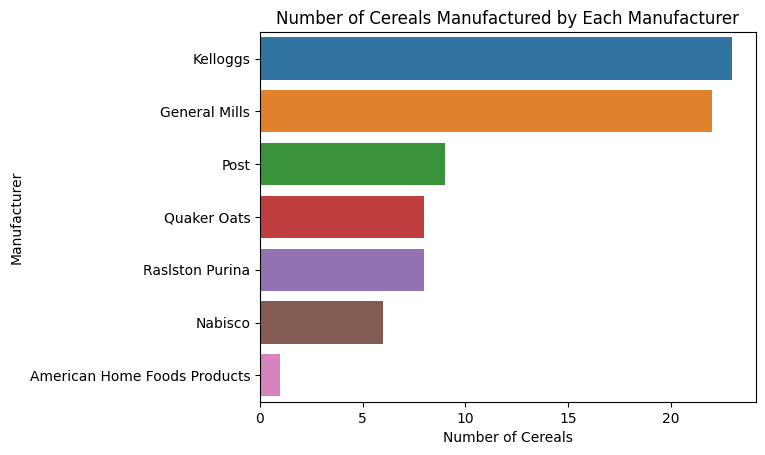

In [102]:
sns.countplot(y=ce['Manufracture'], data=ce,order=ce['Manufracture'].value_counts().index)
plt.xlabel("Number of Cereals")
plt.ylabel("Manufacturer")
plt.title("Number of Cereals Manufactured by Each Manufacturer")

3.Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as a test set.

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
ce.head(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufracture
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats


In [105]:
x=ce.iloc[:,3:-2]
y=ce['rating']

In [106]:
x.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000


In [107]:
y.describe()

count    77.000000
mean     42.665705
std      14.047289
min      18.042851
25%      33.174094
50%      40.400208
75%      50.828392
max      93.704912
Name: rating, dtype: float64

In [108]:
print(x.shape)
print(y.shape)

(77, 12)
(77,)


In [109]:
x.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
dtype: int64

In [110]:
y.isnull().sum()

0

In [111]:
x.head(2)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00


In [112]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

4. Fit a linear regression module and measure the mean squared error on the test
dataset.
[ Hint: Explore linear models and metrics section of sklearn documentation]

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr=LinearRegression()

In [115]:
X_train.head(2)


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
30,100,2,0,45,0.0,11.0,15,40,25,1,1.0,0.88
40,110,2,1,260,0.0,21.0,3,40,25,2,1.0,1.50


In [116]:
 lr.fit(X_train,Y_train)

LinearRegression()

In [117]:
predict=lr.predict(X_test)

In [123]:
from sklearn.metrics import mean_squared_error,r2_score,adjusted_rand_score
mse=mean_squared_error(Y_test,predict)
r2_score=r2_score(Y_test,predict)

In [119]:
mse

9.107561827305189e-14

In [121]:
r2_score*100

99.99999999999996

In [124]:
adjusted_rand_score(Y_test,predict)

C:\Users\Komal\miniconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


1.0